# 感知机模型及其应用示例

Author：**周建山    BY1613123**

Email：jianshanzhou@foxmail.com

Web: https://github.com/JianshanZhou/Computing-Intelligence-Course.git

在本课程学习报告中，首先给出**感知机**(Perceptron)模型的基本算法原理，进而以课程作业中给定的**二元分类问题**作为案例，展示**感知机**模型的应用和基于Python程序语言实现的基本步骤。

## 感知机模型

从**Frank Rosenblatt**于1957年提出感知机模型以来[1](#ref1)，该模型成为了后续发展建立起来的支持向量机(Support Vector Machine, SVM)和人工神经网络(Artificial Neural Network, ANN)这两大机器学习模型的基础。标准的感知机本质上是一种线性模型，在研究单个训练样本的二元分类问题方面具有一定应用价[2](#ref2)。感知机的基本网络结构包含一个神经元，用于接收多个输入信号$\mathbf{X}_{j}=\left[x_{1,j},x_{2,j},\ldots,x_{n,j}\right]^{\mathrm{T}}$，该输入信号对应的标签标表示为$y_i\in\mathbb{S}_{k}$ (为了简化讨论，本报告考虑一维标签情况)，其中，$x_{i,j}$表示第$j$个向量形式的样本$\mathbf{x}_j$中的第$i$个分量，$\mathbb{S}_k$表示该标签所隶属的第$k$类模式空间。如下图所示给出感知机模型基本的结构。

![感知机神经元结构](../Images/PerceptronStructure.jpg "A perceptron network.")

如图示中，该感知机模型中的激励函数$f(\cdot)$的具体形式为：
$$
y_j=f\left(
\sum_{i=1}^{n}{w_{i}x_{i,j}}-\theta
\right)=f\left(\mathbf{W}^{\mathrm{T}}\mathbf{X}_{j}-\theta\right)
$$
其中，$\mathbf{W}=[w_1,w_2,\ldots,w_n]^{\mathrm{T}}$为神经元连接的权重参数，$\theta$表示神经元受激励阈值。值得指出，为了便于运算处理，通常将该参数$\theta$视为一个权重分量，进而可将权重向量写为：$\mathbf{W}=[w_1,w_2,\ldots,w_n,\theta]^{\mathrm{T}}$，将输入信号向量改写为：$\mathbf{X}_{j}=[x_{1,j},x_{2,j},\ldots,x_{n,j},-1]^{\mathrm{T}}$。据此，上述式子可变换为：$y_j=f\left(\mathbf{W}^{\mathrm{T}}\mathbf{X}_{j}\right)$。Rosenblatt最初提出的感知机模型采用阶跃函数作为激励函数的具体表达形式，因此，可有
$$
f(x)=
\begin{cases}
1,&x>0;\\
0,&x\leq0.
\end{cases}
$$
根据上述感知机的基本数学模型，即可建立相应的感知机计算程序，具体如下：

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    if x>0:
        return 1.
    else:
        return 0.

def neuron(X, W, theta, activation_function = step_function):
    x = np.dot(W.T,X)[0]-theta
    return activation_function(x)

其中，阶跃函数的图像形态如下图所示。

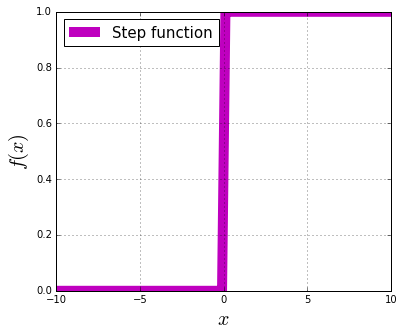

In [2]:
x = np.linspace(-10,10,100)
y = [step_function(v) for v in x]

plt.figure(0,figsize=(6,5))
plt.grid(True)
plt.plot(x,y,label = "Step function", ls = "-", lw = 10.,c="m")
plt.xlabel("$x$",fontsize=20.)
plt.ylabel("$f(x)$",fontsize=20.)
plt.legend(fontsize=15.,loc="upper left")
plt.show()

## 感知机学习算法

在上述感知机模型中，给定训练样本——由每一个输入信号向量和其对应的模式类型标签构成的样本对：$\left\{\mathbf{X}_j,y_j\right\}$，为了使感知机能够根据输入信号向量划分其所属的类型，需要求解满足这种"**分类**"目标的模型参数：$\mathbf{W}$和$\theta$。这里，为了确定能够满足所有样本正确分类的感知机权重和偏置系数，可以利用**误差矫正**形式的迭代学习算法求解所述参数。这种算法的本质机理在于：

如果在某一个迭代步$t$，对应的权重参数为$\mathbf{W}(t)=\left[w_{1}(t),w_{n}(t),\theta(t)\right]^{\mathrm{T}}$,针对任意一个样本$j$，可以计算得到其在该迭代步的分类信号：
$$y_j(t)=f\left(\mathbf{W}(t)^{\mathrm{T}}\mathbf{X}_j\right)$$
进而可以对应得到该分类信号和正确分类信号的误差为：
$$y_j-y_j(t)$$
则感知机权重参数迭代方程可以表达为：
$$\mathbf{W}(t+1) = \mathbf{W}(t)
+\delta\left(y_j-y_j(t)\right)\mathbf{X}_{j}(t)$$
上述迭代方程中，参数$\delta\in(0,1)$表示学习速率(learning rate)。

根据上述迭代方程，则可以设计实现感知机权重参数迭代更新调整直至满足分类要求的算法，该算法即为"**感知机学习算法**"，而上述迭代方程的更新机理也称为**$\delta$法则**(**the delta rule**)。事实上，$\delta$法则根据上述迭代方程，则可以设计实现感知机权重参数迭代更新调整直至满足分类要求的算法，该算法即为"**感知机学习算法**"，而上述迭代方程的更新机理也称为**$\delta$法则**(**the delta rule**)。事实上，$\delta$法则是一种最小化误差平方和的梯度下降算法，通常能够有效地应用于调整单层神经网络的神经元权重参数过程中[3](#ref3)。以二元分类问题为例，亦即$k=2$，$\mathbb{S}_1\subset\mathbb{Z}_{>0}$，$\mathbb{S}_2\subset\mathbb{Z}_{<0}$，具体的感知机学习算法如下所述：

> 1. 给定学习速率$\delta$并初始化感知机的$\mathbf{W}(t)$，令$t=0$；
>
> 2. 重复如下步骤，直至满足条件：对$\forall \left\{\mathbf{X}_j,y_j\right\}$,$\mathrm{sgn}\left(y_j(t)\right)=\mathrm{sgn}\left(y_j\right)$，为止:
    >> 对每一个样本对$\left\{\mathbf{X}_j,y_j\right\}$执行：
    >>
    >> 2.1 计算该第$j$个样本的输出信号量：$y_i(t)=f\left(\mathbf{W}^{\mathrm{T}}(t)\mathbf{X}\right)$，进行判断：
    >>
        >>> 如果已经满足$\mathrm{sgn}\left(y_j(t)\right)=\mathrm{sgn}\left(y_j\right)$，则选择另一个样本对$j\leftarrow j+1$，返回2.1步骤继续执行判断；否则执行2.2步骤；
    >>
    >> 2.2 更新感知机权重参数：$\mathbf{W}(t+1) = \mathbf{W}(t)
+\delta\left(y_j-y_j(t)\right)\mathbf{X}_{j}(t)$，然后选择另一个样本对$j\leftarrow j+1$并返回2.1步骤继续执行。

根据上述感知机学习算法，即可实现相对应的感知机学习程序，具体如下：

In [3]:
def perceptron_learning_alg(inputs, outputs, W, theta, delta):
    epsilon = 1.e-8
    stop_flag = 1
    (input_length, sample_num) = inputs.shape
    iteration_count = 0
    while stop_flag:
        stop_flag = 1
        for j in range(sample_num):
            X_j = inputs[::,j]
            y_j = outputs[j]
            temp_y_j = neuron(X_j, W, theta, step_function)
            if (epsilon-np.abs(temp_y_j-y_j))>0:# if these two have the same sgn
                stop_flag *= 1
                #print "The stop flag at the %d-th epoch is %d with the %d-th input"%(iteration_count,stop_flag,j+1)
            else:
                W[::,0] = W[::,0] + delta*(y_j - temp_y_j)*X_j
                theta = theta + delta*(y_j - temp_y_j)*(-1.0)
                stop_flag *= 2
                #print "The stop flag at the %d-th epoch is %d with the %d-th input"%(iteration_count,stop_flag,j+1)
        iteration_count += 1
        stop_flag = stop_flag - 1
        #print "The stop flag at the %d-th epoch is %d"%(iteration_count,stop_flag)
    return W, theta, iteration_count

## 感知机模型应用示例

以一个简单的线性二元分类问题作为实例，展示感知机模型的应用以及不同的初始权重参数和学习速率对算法收敛结果的影响。

In [4]:
# prepare the training data
inputs = np.array([[2.,2.,3.,4.,5.,5.],[1.,2.,2.,0.0,0.0,1.0]],dtype=float)
outputs = np.array([1,1,1,0,0,0]).T
print "The dimension of the input data is (%d,%d)"%inputs.shape
print "The length of the output data is %d"%outputs.shape[0]

The dimension of the input data is (2,6)
The length of the output data is 6


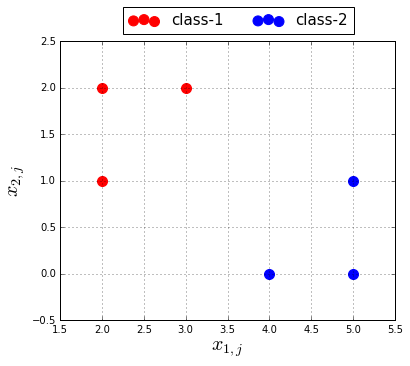

In [5]:
# show these 2-D data 
plt.figure(1,figsize=(6,5))
plt.grid(True)
plt.scatter(inputs[0,0:3], inputs[1, 0:3], label="class-1", c="r", edgecolors='r', cmap=plt.cm.Paired, s=100.)
plt.scatter(inputs[0,3::], inputs[1, 3::], label="class-2", c="b", edgecolors='b', cmap=plt.cm.Paired, s=100.)
plt.xlabel("$x_{1,j}$",fontsize=20.)
plt.ylabel("$x_{2,j}$",fontsize=20.)
plt.legend(fontsize=15., ncol=2, bbox_to_anchor = (.9,1.15))
plt.show()

In [6]:
# Now implement the delta rule-based learning algorithm to realize a perceptron model
# initialize the weights and the threshold
initial_minW = 0.01
initial_maxW = 1.0
W = initial_minW+(initial_maxW-initial_minW)*np.random.rand(2,1)
theta = initial_minW+(initial_maxW-initial_minW)*np.random.rand()

print "The initial weights are:"
print W
print "The intial threshold is:"
print theta
print "With the initial weights and threshold:"
for j in range(6):
    X_j = inputs[::,j]
    y_j = outputs[j]
    temp_y_j = neuron(X_j, W, theta, step_function)
    if (1.e-8-np.abs(temp_y_j-y_j))>0:
        print "the %d-th output has the same sgn as the actual output!"%(j+1,)
    else:
        print "the %d-th output has the different sgn as the actual output!"%(j+1,)
        
# now do train the percetron model
delta = 0.1
W, theta, iteration_count = perceptron_learning_alg(inputs, outputs, W, theta, delta)
print "The total number of epochs is %d with the learning rate %f"%(iteration_count,delta)
print "The convergence weights are:"
print W
print "The convergence threshold is:"
print theta

The initial weights are:
[[ 0.13690862]
 [ 0.19113173]]
The intial threshold is:
0.585200844236
With the initial weights and threshold:
the 1-th output has the different sgn as the actual output!
the 2-th output has the same sgn as the actual output!
the 3-th output has the same sgn as the actual output!
the 4-th output has the same sgn as the actual output!
the 5-th output has the different sgn as the actual output!
the 6-th output has the different sgn as the actual output!
The total number of epochs is 6 with the learning rate 0.100000
The convergence weights are:
[[-0.06309138]
 [ 0.69113173]]
The convergence threshold is:
0.385200844236


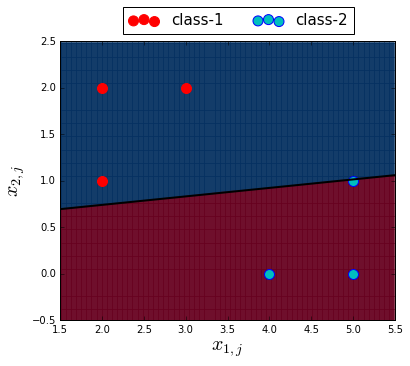

In [7]:
plt.figure(3,figsize=(6,5))
plt.grid(True)
xmin,xmax = inputs[0,::].min()-0.5,inputs[0,::].max()+0.5
ymin,ymax = inputs[1,::].min()-0.5,inputs[1,::].max()+0.5

# put the data into colored plane
def Neuron(W,theta,activation_function = step_function):
    def classification_function(pairs):
        (dim,data_num)=pairs.shape
        Z = np.zeros((data_num,),dtype=float)
        for j in range(data_num):
            Z[j] = neuron(pairs[::,j], W, theta, activation_function)
        return Z
    return classification_function
h = 0.01 # step in a mesh
xx, yy = np.meshgrid(np.arange(xmin, xmax, h),
                         np.arange(ymin, ymax, h))
pairs = np.c_[xx.ravel(),yy.ravel()]
pairs = pairs.T
Z = Neuron(W,theta,step_function)(pairs)
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.5)

# show the decision boundary
def g(W,theta):
    def line(x):
        if np.abs(W[1,0])<=1.e-12:
            W[1,0] = 1.e-12
        return (theta - x*W[0,0])/W[1,0]
    return np.frompyfunc(line, 1, 1)

plt.scatter(inputs[0,0:3], inputs[1, 0:3], label="class-1", c="r", edgecolors='r', cmap=plt.cm.Paired, s=100.)
plt.scatter(inputs[0,3::], inputs[1, 3::], label="class-2", c="c", edgecolors='b', cmap=plt.cm.Paired, s=100.)

x = np.linspace(xmin,xmax,100)
y = g(W,theta)(x)
plt.plot(x,y, ls = "-", lw = 2.,c="k")

plt.xlim((xmin,xmax))
plt.ylim((ymin,ymax))
plt.xlabel("$x_{1,j}$",fontsize=20.)
plt.ylabel("$x_{2,j}$",fontsize=20.)
plt.legend(fontsize=15., ncol=2, bbox_to_anchor = (.9,1.15))

plt.show()

## 模型参数分析

最后，本报告进一步探索不同初始化感知机模型权重参数、激励阈值以及学习率条件对最终算法收敛结果的影响。分析如下所述。设置均匀随机初始化感知机模型权值和激励阈值的区间分别取不同的长度，与此同时，将学习率设置为不同的值，例如：

In [8]:
intervals = np.array([[-0.01,0.01],[-0.1,0.1],[-1.0,1.0],[-10.0,10.0],[-100.0,100.0],[-1000.,1000.]])
deltas = np.array([0.01,0.05,0.1,0.5,0.7,0.9])
interval_num,hello = intervals.shape
delta_num = len(deltas)

------Experiment with the 1-th learning rate and the 1-th initial interval------
The initial interval of the weights and the threshold is set to:
[-0.01  0.01]
The learning rate is set to:
0.01
The initial weights are:
[[-0.00907657]
 [-0.00210933]]
The intial threshold is:
0.00871282467035
With the initial weights and threshold:
The total number of epochs is 3 with the learning rate 0.010000
The convergence weights are:
[[-0.00907657]
 [ 0.01789067]]
The convergence threshold is:
-0.00128717532965
------Experiment with the 1-th learning rate and the 2-th initial interval------
The initial interval of the weights and the threshold is set to:
[-0.1  0.1]
The learning rate is set to:
0.01
The initial weights are:
[[-0.02977135]
 [-0.00295262]]
The intial threshold is:
-0.0279069973932
With the initial weights and threshold:
The total number of epochs is 2 with the learning rate 0.010000
The convergence weights are:
[[-0.00977135]
 [ 0.00704738]]
The convergence threshold is:
-0.037906997

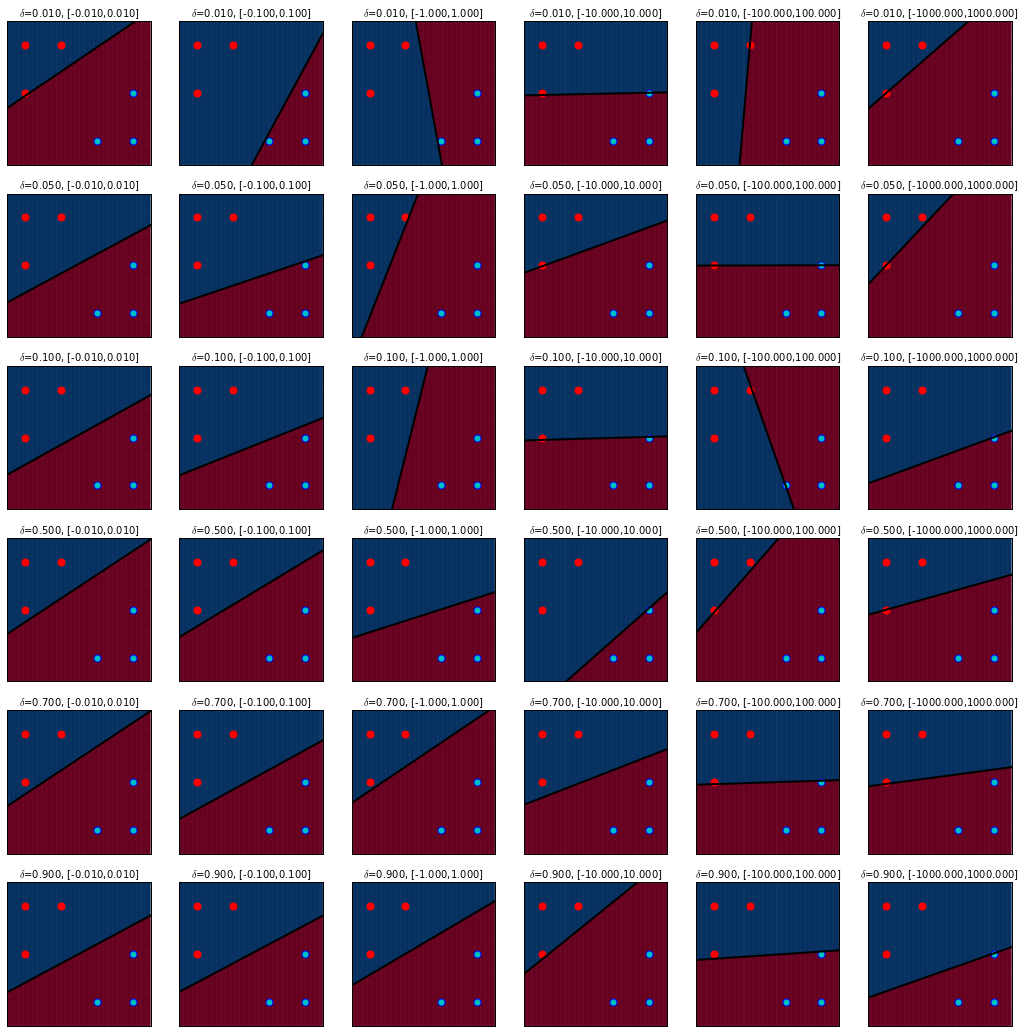

In [19]:
convergence_trace = np.zeros((delta_num,interval_num),dtype=float)
fig, axes = plt.subplots(ncols=delta_num, nrows=interval_num, figsize=(3*delta_num,3*interval_num))
for ax in axes.flat:
    ax.set(xticks=[], yticks=[])

for i in range(delta_num):
    for j in range(interval_num):
        
        print "------Experiment with the %d-th learning rate and the %d-th initial interval------"%(i+1,j+1)
        bounds = intervals[j]
        delta = deltas[i]
        print "The initial interval of the weights and the threshold is set to:"
        print bounds
        print "The learning rate is set to:"
        print delta

        initial_minW = bounds[0]
        initial_maxW = bounds[1]
        W = initial_minW+(initial_maxW-initial_minW)*np.random.rand(2,1)
        theta = initial_minW+(initial_maxW-initial_minW)*np.random.rand()

        print "The initial weights are:"
        print W
        print "The intial threshold is:"
        print theta
        print "With the initial weights and threshold:"

        # now do train the percetron model
        W, theta, iteration_count = perceptron_learning_alg(inputs, outputs, W, theta, delta)
        print "The total number of epochs is %d with the learning rate %f"%(iteration_count,delta)
        print "The convergence weights are:"
        print W
        print "The convergence threshold is:"
        print theta
        
        convergence_trace[i,j] = iteration_count
        
        Z = Neuron(W,theta,step_function)(pairs)
        Z = Z.reshape(xx.shape)
        axes[i,j].pcolormesh(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
        
        axes[i,j].scatter(inputs[0,0:3], inputs[1, 0:3], label="class-1", c="r", edgecolors='r', cmap=plt.cm.Paired, s=50.)
        axes[i,j].scatter(inputs[0,3::], inputs[1, 3::], label="class-2", c="c", edgecolors='b', cmap=plt.cm.Paired, s=50.)

        x = np.linspace(xmin,xmax,100)
        y = g(W,theta)(x)
        axes[i,j].plot(x,y, ls = "-", lw = 2.,c="k")

        axes[i,j].set_xlim((xmin,xmax))
        axes[i,j].set_ylim((ymin,ymax))
        axes[i,j].set_title(r"$\delta$=%.3f, [%.3f,%.3f]" % (delta,initial_minW,initial_maxW), fontsize=10)

plt.show()

**结论1**：从上述仿真计算实验易知，不同随机初始化权值和激励阈值区间条件以及不同的学习速率取值条件对感知机模型实现二元分类性能有重要影响，尤其是，不同的初始迭代条件，导致模型的权值参数和阈值最终收敛于不同的数值，使线性分类的决策边界（如图中黑色实线所示）互不相同。

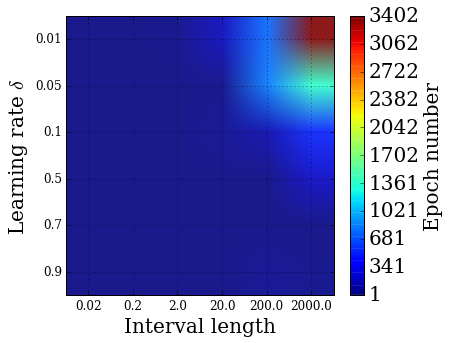

In [41]:
# now I visualize the convergence speed for the sake of comparison
from matplotlib import cm

cmap = cm.jet
fig = plt.figure(4,figsize = (6,5))
im3=plt.imshow(convergence_trace,interpolation='bilinear',cmap=cmap,
               alpha=0.9)
plt.grid(True)
ax = plt.gca()
ax.set_aspect('auto')
xlabelstr = "Interval length"
ylabelstr = "Learning rate $\delta$"
plt.xlabel(xlabelstr, fontsize=20.,
         fontname="serif")
plt.ylabel(ylabelstr, fontsize=20.,
         fontname="serif")
ax.set_xticks(np.arange(0,6,1))
ax.set_yticks(np.arange(0,6,1))
ax.set_xticklabels(intervals[::,1]*2, fontsize=12.,
         fontname="serif")
ax.set_yticklabels(deltas[::], fontsize=12.,
         fontname="serif")
cbar = fig.colorbar(im3)
cbar.set_label('Epoch number', fontsize=20.,
         fontname="serif")
cbar.set_ticks(np.linspace(convergence_trace.min(),convergence_trace.max(),11))
cl = plt.getp(cbar.ax, 'ymajorticklabels') 
plt.setp(cl, fontsize=20.,
         fontname="serif") 

plt.show()

**结论2**：从上述不同随机初始化权值和激励阈值区间条件以及不同的学习速率取值条件对应的算法收敛迭代次数关系可知，随机初始化区间长度（跨度）越大，导致初始化的权重参数和激励阈值差异性越大，而且，学习速率越小，则感知机学习算法收敛速度越慢（收敛所需要的迭代步数越多）；反之，当学习速率增加，随机初始化区间长度减小，则可以加快感知机模型的收敛速度。

最后，值得说明的是，感知机学习模型在线性可分的条件下，算法能够保证收敛性；然而，在线性不可分的问题中，例如"**异或**"判决问题，感知机学习算法并无法保证收敛性，这就制约了该模型在复杂工程问题求解方面的应用。值得肯定的是，感知机模型作为一种简单而优美的模型，为后来各种复杂的神经网络学习理论和支持向量机学习理论的发展奠定了基础。

1. <span id="ref1"> Rosenblatt, Frank (1957). [The Perceptron--a perceiving and recognizing automaton.](https://www.mendeley.com/research/perceptron-perceiving-recognizing-automaton-technical-report-85-460-1/) Report 85-460-1, Cornell Aeronautical Laboratory. </span>
2. <span id="ref2"> Freund, Y., & Schapire, R. E. (1999). [Large margin classification using the perceptron algorithm.](http://cseweb.ucsd.edu/~yfreund/papers/LargeMarginsUsingPerceptron.pdf). Machine Learning, 37(3), 277-296. </span>
3. <span id="ref3"> Wikipedia.  [https://en.wikipedia.org/wiki/Delta_rule#cite_note-1](https://en.wikipedia.org/wiki/Delta_rule#cite_note-1) </span>